In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#show more columns
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('data/IBD NSQIP Year 5 merged v1.csv',na_values='Unknown')
print(data.shape)
#data.head()

(1339, 236)


In [3]:
list(data.columns)

['case.number',
 'completion.status',
 'date.of.birth',
 'age.at.time.of.surgery',
 'gender',
 'race',
 'hispanic.ethnicity',
 'cpt.code',
 'cpt.description',
 'principal.operative.procedure',
 'in.out.patient.status',
 'elective.surgery',
 'origin.status',
 'hospital.admission.date',
 'operation.date',
 'principal.anesthesia.technique',
 'additional.anesthesia.technique.s.',
 'surgical.specialty',
 'height',
 'height.unit',
 'height.unknown',
 'weight',
 'weight.unit',
 'weight.unknown',
 'bmi',
 'diabetes.mellitus',
 'current.smoker.within.1.year',
 'dyspnea',
 'functional.heath.status',
 'ventilator.dependent',
 'history.of.severe.copd',
 'ascites.w.in.30.days.prior.to.surgery',
 'congestive.heart.failure.w.in.30.days.prior.to.surgery',
 'hypertension.requiring.medication',
 'acute.renal.failure',
 'currently.requiring.or.on.dialysis',
 'disseminated.cancer',
 'open.wound.with.or.without.infection',
 'steroid.immunosuppressant.use.for.chronic.condition',
 'malnourishment',
 'bleedin

In [4]:
#subset to only CPT code 44205 or 44160
data = data.loc[data['cpt.code'].isin([44205,44160]) | data['cpt.code'].isin(['44205','44160'])]
print(data.shape)
#drop all observations that have 'ileostomy.formation' set to missing
data = data.dropna(subset=['ileostomy.formation'])
print(data.shape)


(374, 236)
(280, 236)


In [5]:
data['colectomy.primary.indication.for.surgery'].value_counts()

Crohn's Disease                     256
Colon cancer                          8
Ulcerative colitis                    5
Other-Enter ICD-10 for diagnosis      5
Chronic diverticular disease          4
Colon cancer w/ obstruction           1
Non-malignant polyp                   1
Name: colectomy.primary.indication.for.surgery, dtype: int64

In [6]:
#Only want Crohn's disease
data = data.loc[data['colectomy.primary.indication.for.surgery'].isin(["Crohn's Disease"])]
print(data.shape)


(256, 236)


In [7]:
#combine colectomy.operative.approach categories
data['colectomy.operative.approach'] = data['colectomy.operative.approach'].replace({'Endoscopic w/ unplanned conversion to open':'MIS unplanned conversion to open','Hybrid':'MIS','Laparoscopic':'MIS','Laparoscopic w/ open assist':'MIS','Laparoscopic w/ unplanned conversion to open':'MIS, unplanned conversion to open','Open (planned)':'Open','Robotic':'MIS','Robotic w/ open assist':'MIS','Robotic w/ unplanned conversion to open':'MIS, unplanned conversion to open','SILS':'MIS','SILS w/ unplanned conversion to open':'MIS'})
#binarize 'ileostomy.formation' outcomes
data['ileostomy.formation'] = data['ileostomy.formation'].replace({'New ileostomy':'Ileostomy','Other ileostomy revision':'Ileostomy','Conversion of end ileostomy to loop':'Ileostomy','Ileostomy from prior is unaltered':'Ileostomy'})


In [8]:
#if 'height.unit' is 'in', convert to 'cm' | if 'weight.unit' is 'lb', convert to 'kg'
#get height and weight to the correct units
for x in data.index:
    if data['height.unit'][x] == 'in':
        data['height'][x] = data['height'][x] * 2.54
    if data['weight.unit'][x] == 'lb':
        data['weight'][x] = data['weight'][x] * 0.453592

/tmp/ipykernel_23943/3933278702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'][x] = data['height'][x] * 2.54


<AxesSubplot:>

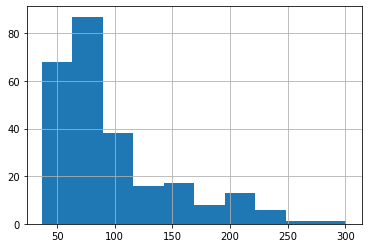

In [9]:
data['weight'].hist()

<AxesSubplot:>

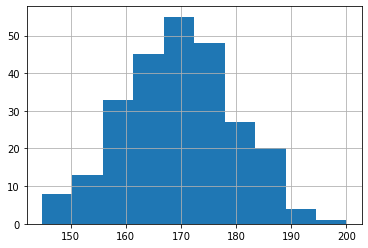

In [10]:
data['height'].hist()

In [11]:
# there is an outcome called 'ibd_ileost' that wasn't addressed in preproc.ipynb
# guess we'll call it ileostomy
data['ileostomy.formation'] = data['ileostomy.formation'].replace({'ibd_ileost':'Ileostomy'})
data['ileostomy.formation'].value_counts()

None         200
Ileostomy     56
Name: ileostomy.formation, dtype: int64

In [12]:
data['colectomy.operative.approach'].value_counts()

MIS                                  47
Open                                 13
MIS, unplanned conversion to open     6
Name: colectomy.operative.approach, dtype: int64

In [13]:
# large amount of NA in the 'colectomy.operative.approach'
data['colectomy.operative.approach'].value_counts(dropna=False)

NaN                                  190
MIS                                   47
Open                                  13
MIS, unplanned conversion to open      6
Name: colectomy.operative.approach, dtype: int64

In [27]:
#renaming columns
data.columns = data.columns.str.replace('surgical.wound.s..closure','surgical.wound(s).closure',regex=False)
data.columns = data.columns.str.replace('sepsis,.sirs.sepsis.septic.shock.>.48h.','sepsis.(sirs/sepsis/septic.shock).(48h)',regex=False)
data.columns = data.columns.str.replace('duration.of.surgical.procedure,.in.minutes.','duration.of.surgical.procedure.(in.minutes)',regex=False)
data.columns = data.columns.str.replace('#.of.postop.transfusion.intraop,.postop,.72h.of.surgery.start.time.','#.of.postop.transfusion.intraop/.postop.(72h.of.surgery.start.time)',regex=False)
data.columns = data.columns.str.replace('x.','#',regex=False)
data.columns = data.columns.str.replace('w.in','w/in',regex=False)
data.columns = data.columns.str.replace('...','.>.',regex=False)
data.columns = data.columns.str.replace('..',',.',regex=False)
data.columns = data.columns.str.replace('procedure.surgery','procedure/surgery',regex=False)
data.columns = data.columns.str.replace('organ.space','organ/space',regex=False)
data.columns = data.columns.str.replace('steroid.immunosuppressant','steroid/immunosuppressant',regex=False)
data.columns = data.columns.str.replace('in.out.patient.status','in/out-patient.status',regex=False)
data.columns = data.columns.str.replace('preop.transfusions,.rbc.w/in.72.hrs.prior.to.surgery.start.time.','preop.transfusions.(rbc.w/in.72.hrs.prior.to.surgery.start.time)',regex=False)
data.columns = data.columns.str.replace('ast.sgot','ast/sgot',regex=False)
data.columns = data.columns.str.replace('#.of.postop.transfusion.intraop..postop..72h.of.surgery.start.time.','#.of.postop.transfusion.intraop/.postop.(72h.of.surgery.start.time)',regex=False)
data.columns = data.columns.str.replace('preop.transfusions..rbc.w/in.72.hrs.prior.to.surgery.start.time.','preop.transfusions.(rbc.w/in.72.hrs.prior.to.surgery.start.time)',regex=False)
data.columns = data.columns.str.replace('#.of.postop.c,.diff','#.of.postop.c..diff',regex=False)
data.columns = data.columns.str.replace('colectomy.non.emergent.indication.icd10.code','colectomy.non-emergent.indication.icd10.code',regex=False)

In [15]:
#list(data)

In [16]:
data_1_4 = pd.read_csv('data/data_clean1.csv',na_values='Unknown')
data_1_4_vars = list(data_1_4)

In [17]:
data_1_4.shape

(1302, 90)

In [18]:
#find rows which are duplicated and show the duplicates
data_1_4[data_1_4.duplicated(keep=False)].sort_values(by='case.number').head(12)

,case.number,age.at.time.of.surgery,gender,race,hispanic.ethnicity,cpt.code,in/out-patient.status,elective.surgery,origin.status,height,weight,bmi,diabetes.mellitus,current.smoker.within.1.year,dyspnea,functional.heath.status,ventilator.dependent,history.of.severe.copd,ascites.w/in.30.days.prior.to.surgery,congestive.heart.failure.w/in.30.days.prior.to.surgery,hypertension.requiring.medication,acute.renal.failure,currently.requiring.or.on.dialysis,disseminated.cancer,open.wound.with.or.without.infection,steroid/immunosuppressant.use.for.chronic.condition,>10%.loss.of.body.weight.in.the.6.months.prior.to.surgery,bleeding.disorder,preop.transfusions.(rbc.w/in.72.hrs.prior.to.surgery.start.time),sepsis.(sirs/sepsis/septic.shock).(48h),serum.sodium,bun,serum.creatinine,albumin,wbc,hematocrit,platelet.count,emergency.case,wound.classification,asa.classification,#.of.other.procedures,#.of.concurrent.procedures,surgical.wound(s).closure,duration.of.surgical.procedure.(in.minutes),#.of.postop.superficial.incisional.ssi,#.of.postop.deep.incisional.ssi,#.of.postop.organ/space.ssi,#.of.postop.wound.disruption,#.of.postop.pneumonia,#.of.postop.unplanned.intubation,#.of.postop.pulmonary.embolism,#.of.postop.on.ventilator.>.48.hours,#.of.postop.progressive.renal.insufficiency,#.of.postop.acute.renal.failure,#.of.postop.uti,#.of.postop.cva,#.of.postop.cardiac.arrest.requiring.cpr,#.of.postop.myocardial.infarction,#.of.postop.transfusion.intraop/.postop.(72h.of.surgery.start.time),#.of.postop.vein.thrombosis.requiring.therapy,#.of.postop.c..diff,#.of.postop.sepsis,#.of.postop.septic.shock,#.of.postop.other.occurrences,hospital.length.of.stay,hospital.discharge.destination,postop.death.w/in.30.days.of.procedure,postoperative.death.>.30.days.of.procedure,#.of.readmissions.w/in.30.days,#.of.unplanned.readmissions,first.unplanned.return.to.or,first.unplanned.return.cpt,colectomy.steroid/immunosuppressant.for.inflammatory.bowel,colectomy.mechanical.bowel.prep,colectomy.oral.antibiotic.prep,colectomy.chemotherapy.w/in.90.days,colectomy.primary.indication.for.surgery,colectomy.non-emergent.indication.icd10.code,colectomy.operative.approach,"colectomy.malignancy,.pathologic.t.stage","colectomy.malignancy,.pathologic.n.stage","colectomy.malignancy,.pathologic.m.stage",colectomy.number.of.nodes.evaluated,colectomy.postop.anastomotic.leak,colectomy.prolonged.postoperative.npo.or.ngt.use,ileostomy.formation,biologic.agent.60.days.prior.to.surgery,immune.modulation.60.days.prior.to.surgery,colonic.dysplasia,malnourishment
900,117526.0,41.81,Male,White,No,44205,Inpatient,No,Not transferred (admitted from home),180.00,59.9,18.49,No,No,No,Independent,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,None,145.0,15.0,0.51,3.3,11.58,31.7,509.0,No,Clean/Contaminated,ASA 3 - Severe Disturb,0,0,All layers of incision (deep and superficial) ...,90.0,0,0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,13.0,Home,No,NaN,0.0,0,No,NaN,Yes,No,Yes,No,Crohn's Disease,NaN,MIS,NaN,NaN,NaN,NaN,No definitive diagnosis of leak/leak related a...,No,None,Yes,No,No Dysplasia,NaN
454,117526.0,41.81,Male,White,No,44205,Inpatient,No,Not transferred (admitted from home),180.00,59.9,18.49,No,No,No,Independent,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,None,145.0,15.0,0.51,3.3,11.58,31.7,509.0,No,Clean/Contaminated,ASA 3 - Severe Disturb,0,0,All layers of incision (deep and superficial) ...,90.0,0,0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,13.0,Home,No,NaN,0.0,0,No,NaN,Yes,No,Yes,No,Crohn's Disease,NaN,MIS,NaN,NaN,NaN,NaN,No definitive diagnosis of leak/leak related a...,No,None,Yes,No,No Dysplasia,NaN
455,117527.0,46.60,Female,White,No,44160,Inpatient,No,Not transferred (admitted from home),152.40,71.6,30.83,No,Yes,No,Independent,No,No,No,No,No,No,No,No,No,Yes,No,No,No,None,137.0,14.0,0.66,3.6,15.31,32.3,373.0,No,Clean/Contaminated,ASA 3 - Severe Disturb,0,0,All layers of incision (deep and superficial) ...,109.0,0,0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,11.0,Home,No,NaN,0.0,0,No

In [19]:
#drop the duplicates
data_1_4 = data_1_4.drop_duplicates()
print(data_1_4.shape)

(1230, 90)


In [20]:
data_1_4.shape

(1230, 90)

In [21]:
yr_5_vars = list(data)
sum = 0
for i in range(len(data_1_4_vars)):
    if (data_1_4_vars[i] in yr_5_vars):
        #print("IN",data_1_4_vars[i])
        sum+=1
    else:
        print("OUT",data_1_4_vars[i])
print(sum)


OUT >10%.loss.of.body.weight.in.the.6.months.prior.to.surgery
OUT sepsis.(sirs/sepsis/septic.shock).(48h)
OUT duration.of.surgical.procedure.(in.minutes)
OUT #.of.postop.transfusion.intraop/.postop.(72h.of.surgery.start.time)
86


In [22]:
data_1_4['>10%.loss.of.body.weight.in.the.6.months.prior.to.surgery'].value_counts(dropna=False)

NaN    706
No     451
Yes     73
Name: >10%.loss.of.body.weight.in.the.6.months.prior.to.surgery, dtype: int64

In [23]:
data['malnourishment'].value_counts(dropna=False)

NaN    256
Name: malnourishment, dtype: int64

In [24]:
data_1_4.drop(['>10%.loss.of.body.weight.in.the.6.months.prior.to.surgery'],axis=1,inplace=True)
data_1_4_vars = list(data_1_4)

In [25]:
yr_5_vars = list(data)
sum = 0
for i in range(len(data_1_4_vars)):
    if (data_1_4_vars[i] in yr_5_vars):
        #print("IN",data_1_4_vars[i])
        sum+=1
    else:
        print("OUT",data_1_4_vars[i])
print(sum)

OUT sepsis.(sirs/sepsis/septic.shock).(48h)
OUT duration.of.surgical.procedure.(in.minutes)
OUT #.of.postop.transfusion.intraop/.postop.(72h.of.surgery.start.time)
86


In [28]:
data_5 = data[data_1_4_vars]

In [29]:
#find rows which are duplicated and show the duplicates
data_5[data_5.duplicated(keep=False)].sort_values(by='case.number').head(12)

,case.number,age.at.time.of.surgery,gender,race,hispanic.ethnicity,cpt.code,in/out-patient.status,elective.surgery,origin.status,height,weight,bmi,diabetes.mellitus,current.smoker.within.1.year,dyspnea,functional.heath.status,ventilator.dependent,history.of.severe.copd,ascites.w/in.30.days.prior.to.surgery,congestive.heart.failure.w/in.30.days.prior.to.surgery,hypertension.requiring.medication,acute.renal.failure,currently.requiring.or.on.dialysis,disseminated.cancer,open.wound.with.or.without.infection,steroid/immunosuppressant.use.for.chronic.condition,bleeding.disorder,preop.transfusions.(rbc.w/in.72.hrs.prior.to.surgery.start.time),sepsis.(sirs/sepsis/septic.shock).(48h),serum.sodium,bun,serum.creatinine,albumin,wbc,hematocrit,platelet.count,emergency.case,wound.classification,asa.classification,#.of.other.procedures,#.of.concurrent.procedures,surgical.wound(s).closure,duration.of.surgical.procedure.(in.minutes),#.of.postop.superficial.incisional.ssi,#.of.postop.deep.incisional.ssi,#.of.postop.organ/space.ssi,#.of.postop.wound.disruption,#.of.postop.pneumonia,#.of.postop.unplanned.intubation,#.of.postop.pulmonary.embolism,#.of.postop.on.ventilator.>.48.hours,#.of.postop.progressive.renal.insufficiency,#.of.postop.acute.renal.failure,#.of.postop.uti,#.of.postop.cva,#.of.postop.cardiac.arrest.requiring.cpr,#.of.postop.myocardial.infarction,#.of.postop.transfusion.intraop/.postop.(72h.of.surgery.start.time),#.of.postop.vein.thrombosis.requiring.therapy,#.of.postop.c..diff,#.of.postop.sepsis,#.of.postop.septic.shock,#.of.postop.other.occurrences,hospital.length.of.stay,hospital.discharge.destination,postop.death.w/in.30.days.of.procedure,postoperative.death.>.30.days.of.procedure,#.of.readmissions.w/in.30.days,#.of.unplanned.readmissions,first.unplanned.return.to.or,first.unplanned.return.cpt,colectomy.steroid/immunosuppressant.for.inflammatory.bowel,colectomy.mechanical.bowel.prep,colectomy.oral.antibiotic.prep,colectomy.chemotherapy.w/in.90.days,colectomy.primary.indication.for.surgery,colectomy.non-emergent.indication.icd10.code,colectomy.operative.approach,"colectomy.malignancy,.pathologic.t.stage","colectomy.malignancy,.pathologic.n.stage","colectomy.malignancy,.pathologic.m.stage",colectomy.number.of.nodes.evaluated,colectomy.postop.anastomotic.leak,colectomy.prolonged.postoperative.npo.or.ngt.use,ileostomy.formation,biologic.agent.60.days.prior.to.surgery,immune.modulation.60.days.prior.to.surgery,colonic.dysplasia,malnourishment


In [30]:
comb_data = pd.concat([data_1_4,data_5],axis=0)
comb_data.shape

(1486, 89)

In [31]:
comb_data.head()

,case.number,age.at.time.of.surgery,gender,race,hispanic.ethnicity,cpt.code,in/out-patient.status,elective.surgery,origin.status,height,weight,bmi,diabetes.mellitus,current.smoker.within.1.year,dyspnea,functional.heath.status,ventilator.dependent,history.of.severe.copd,ascites.w/in.30.days.prior.to.surgery,congestive.heart.failure.w/in.30.days.prior.to.surgery,hypertension.requiring.medication,acute.renal.failure,currently.requiring.or.on.dialysis,disseminated.cancer,open.wound.with.or.without.infection,steroid/immunosuppressant.use.for.chronic.condition,bleeding.disorder,preop.transfusions.(rbc.w/in.72.hrs.prior.to.surgery.start.time),sepsis.(sirs/sepsis/septic.shock).(48h),serum.sodium,bun,serum.creatinine,albumin,wbc,hematocrit,platelet.count,emergency.case,wound.classification,asa.classification,#.of.other.procedures,#.of.concurrent.procedures,surgical.wound(s).closure,duration.of.surgical.procedure.(in.minutes),#.of.postop.superficial.incisional.ssi,#.of.postop.deep.incisional.ssi,#.of.postop.organ/space.ssi,#.of.postop.wound.disruption,#.of.postop.pneumonia,#.of.postop.unplanned.intubation,#.of.postop.pulmonary.embolism,#.of.postop.on.ventilator.>.48.hours,#.of.postop.progressive.renal.insufficiency,#.of.postop.acute.renal.failure,#.of.postop.uti,#.of.postop.cva,#.of.postop.cardiac.arrest.requiring.cpr,#.of.postop.myocardial.infarction,#.of.postop.transfusion.intraop/.postop.(72h.of.surgery.start.time),#.of.postop.vein.thrombosis.requiring.therapy,#.of.postop.c..diff,#.of.postop.sepsis,#.of.postop.septic.shock,#.of.postop.other.occurrences,hospital.length.of.stay,hospital.discharge.destination,postop.death.w/in.30.days.of.procedure,postoperative.death.>.30.days.of.procedure,#.of.readmissions.w/in.30.days,#.of.unplanned.readmissions,first.unplanned.return.to.or,first.unplanned.return.cpt,colectomy.steroid/immunosuppressant.for.inflammatory.bowel,colectomy.mechanical.bowel.prep,colectomy.oral.antibiotic.prep,colectomy.chemotherapy.w/in.90.days,colectomy.primary.indication.for.surgery,colectomy.non-emergent.indication.icd10.code,colectomy.operative.approach,"colectomy.malignancy,.pathologic.t.stage","colectomy.malignancy,.pathologic.n.stage","colectomy.malignancy,.pathologic.m.stage",colectomy.number.of.nodes.evaluated,colectomy.postop.anastomotic.leak,colectomy.prolonged.postoperative.npo.or.ngt.use,ileostomy.formation,biologic.agent.60.days.prior.to.surgery,immune.modulation.60.days.prior.to.surgery,colonic.dysplasia,malnourishment
0,127544.0,28.82,Female,White,No,44160,Inpatient,No,Outside emergency department,177.80,113.00,35.74,No,No,No,Independent,No,No,No,No,No,No,No,No,No,Yes,No,No,None,139.0,5.0,0.60,5.2,5.1,33.2,193.0,No,Clean/Contaminated,ASA 3 - Severe Disturb,2,0,All layers of incision (deep and superficial) ...,119.0,0,0,1.0,0,0,0,1,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,9.0,Home,No,NaN,0.0,0,No,NaN,Yes,No,No,No,Crohn's Disease,NaN,Open,NaN,NaN,NaN,6.0,No definitive diagnosis of leak/leak related a...,No,Ileostomy,No,Yes,No Dysplasia,NaN
1,127711.0,24.56,Female,White,No,44205,Inpatient,No,Not transferred (admitted from home),162.56,88.20,33.38,No,Yes,Moderate Exertion,Independent,No,No,No,No,No,No,No,No,No,No,No,No,None,138.0,11.0,0.76,4.1,17.2,44.0,277.0,No,Clean/Contaminated,ASA 2 - Mild Disturb,0,0,All layers of incision (deep and superficial) ...,129.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,4.0,Home,No,NaN,0.0,0,No,NaN,No,NaN,No,No,Crohn's Disease,NaN,MIS,NaN,NaN,NaN,9.0,No definitive diagnosis of leak/leak related a...,No,None,Yes,No,No Dysplasia,NaN
2,128513.0,21.40,Female,Black or African American,No,44160,Inpatient,No,Not transferred (admitted from home),157.48,83.92,33.84,No,No,No,Independent,No,No,No,No,No,No,No,No,No,Yes,No,No,Sepsis,138.0,9.0,0.85,2.9,29.7,33.4,478.0,Yes,Dirty/Infected,ASA 3 - Severe Disturb,0,0,All layers of incision (deep and superficial) ...,141.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,8.0,Home,No,NaN,0.0,0,No,NaN,Yes,No,No,No,Crohn's Dis

In [32]:
comb_data[comb_data.duplicated(keep=False)].sort_values(by='case.number').head(12)

,case.number,age.at.time.of.surgery,gender,race,hispanic.ethnicity,cpt.code,in/out-patient.status,elective.surgery,origin.status,height,weight,bmi,diabetes.mellitus,current.smoker.within.1.year,dyspnea,functional.heath.status,ventilator.dependent,history.of.severe.copd,ascites.w/in.30.days.prior.to.surgery,congestive.heart.failure.w/in.30.days.prior.to.surgery,hypertension.requiring.medication,acute.renal.failure,currently.requiring.or.on.dialysis,disseminated.cancer,open.wound.with.or.without.infection,steroid/immunosuppressant.use.for.chronic.condition,bleeding.disorder,preop.transfusions.(rbc.w/in.72.hrs.prior.to.surgery.start.time),sepsis.(sirs/sepsis/septic.shock).(48h),serum.sodium,bun,serum.creatinine,albumin,wbc,hematocrit,platelet.count,emergency.case,wound.classification,asa.classification,#.of.other.procedures,#.of.concurrent.procedures,surgical.wound(s).closure,duration.of.surgical.procedure.(in.minutes),#.of.postop.superficial.incisional.ssi,#.of.postop.deep.incisional.ssi,#.of.postop.organ/space.ssi,#.of.postop.wound.disruption,#.of.postop.pneumonia,#.of.postop.unplanned.intubation,#.of.postop.pulmonary.embolism,#.of.postop.on.ventilator.>.48.hours,#.of.postop.progressive.renal.insufficiency,#.of.postop.acute.renal.failure,#.of.postop.uti,#.of.postop.cva,#.of.postop.cardiac.arrest.requiring.cpr,#.of.postop.myocardial.infarction,#.of.postop.transfusion.intraop/.postop.(72h.of.surgery.start.time),#.of.postop.vein.thrombosis.requiring.therapy,#.of.postop.c..diff,#.of.postop.sepsis,#.of.postop.septic.shock,#.of.postop.other.occurrences,hospital.length.of.stay,hospital.discharge.destination,postop.death.w/in.30.days.of.procedure,postoperative.death.>.30.days.of.procedure,#.of.readmissions.w/in.30.days,#.of.unplanned.readmissions,first.unplanned.return.to.or,first.unplanned.return.cpt,colectomy.steroid/immunosuppressant.for.inflammatory.bowel,colectomy.mechanical.bowel.prep,colectomy.oral.antibiotic.prep,colectomy.chemotherapy.w/in.90.days,colectomy.primary.indication.for.surgery,colectomy.non-emergent.indication.icd10.code,colectomy.operative.approach,"colectomy.malignancy,.pathologic.t.stage","colectomy.malignancy,.pathologic.n.stage","colectomy.malignancy,.pathologic.m.stage",colectomy.number.of.nodes.evaluated,colectomy.postop.anastomotic.leak,colectomy.prolonged.postoperative.npo.or.ngt.use,ileostomy.formation,biologic.agent.60.days.prior.to.surgery,immune.modulation.60.days.prior.to.surgery,colonic.dysplasia,malnourishment


In [33]:
comb_data[comb_data.duplicated(subset=['case.number', 'age.at.time.of.surgery', 'gender'], keep=False)].sort_values(by='case.number').head(12)

,case.number,age.at.time.of.surgery,gender,race,hispanic.ethnicity,cpt.code,in/out-patient.status,elective.surgery,origin.status,height,weight,bmi,diabetes.mellitus,current.smoker.within.1.year,dyspnea,functional.heath.status,ventilator.dependent,history.of.severe.copd,ascites.w/in.30.days.prior.to.surgery,congestive.heart.failure.w/in.30.days.prior.to.surgery,hypertension.requiring.medication,acute.renal.failure,currently.requiring.or.on.dialysis,disseminated.cancer,open.wound.with.or.without.infection,steroid/immunosuppressant.use.for.chronic.condition,bleeding.disorder,preop.transfusions.(rbc.w/in.72.hrs.prior.to.surgery.start.time),sepsis.(sirs/sepsis/septic.shock).(48h),serum.sodium,bun,serum.creatinine,albumin,wbc,hematocrit,platelet.count,emergency.case,wound.classification,asa.classification,#.of.other.procedures,#.of.concurrent.procedures,surgical.wound(s).closure,duration.of.surgical.procedure.(in.minutes),#.of.postop.superficial.incisional.ssi,#.of.postop.deep.incisional.ssi,#.of.postop.organ/space.ssi,#.of.postop.wound.disruption,#.of.postop.pneumonia,#.of.postop.unplanned.intubation,#.of.postop.pulmonary.embolism,#.of.postop.on.ventilator.>.48.hours,#.of.postop.progressive.renal.insufficiency,#.of.postop.acute.renal.failure,#.of.postop.uti,#.of.postop.cva,#.of.postop.cardiac.arrest.requiring.cpr,#.of.postop.myocardial.infarction,#.of.postop.transfusion.intraop/.postop.(72h.of.surgery.start.time),#.of.postop.vein.thrombosis.requiring.therapy,#.of.postop.c..diff,#.of.postop.sepsis,#.of.postop.septic.shock,#.of.postop.other.occurrences,hospital.length.of.stay,hospital.discharge.destination,postop.death.w/in.30.days.of.procedure,postoperative.death.>.30.days.of.procedure,#.of.readmissions.w/in.30.days,#.of.unplanned.readmissions,first.unplanned.return.to.or,first.unplanned.return.cpt,colectomy.steroid/immunosuppressant.for.inflammatory.bowel,colectomy.mechanical.bowel.prep,colectomy.oral.antibiotic.prep,colectomy.chemotherapy.w/in.90.days,colectomy.primary.indication.for.surgery,colectomy.non-emergent.indication.icd10.code,colectomy.operative.approach,"colectomy.malignancy,.pathologic.t.stage","colectomy.malignancy,.pathologic.n.stage","colectomy.malignancy,.pathologic.m.stage",colectomy.number.of.nodes.evaluated,colectomy.postop.anastomotic.leak,colectomy.prolonged.postoperative.npo.or.ngt.use,ileostomy.formation,biologic.agent.60.days.prior.to.surgery,immune.modulation.60.days.prior.to.surgery,colonic.dysplasia,malnourishment
678,116483.0,65.05,Female,White,No,44205,Inpatient,Yes,Not transferred (admitted from home),165.10,67.4,24.73,Non-Insulin,No,No,Independent,No,No,No,No,No,No,No,No,No,No,No,No,None,138.0,7.0,0.70,4.2,5.7,43.3,243.0,No,Clean/Contaminated,ASA 3 - Severe Disturb,0,0,All layers of incision (deep and superficial) ...,65.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8.0,Home,No,No,0.0,0,No,NaN,No,Yes,Yes,No,Crohn's Disease,NaN,MIS,NaN,NaN,NaN,5.0,No definitive diagnosis of leak/leak related a...,Yes,None,Yes,No,No Dysplasia,NaN
157,116483.0,65.05,Female,White,No,44205,Inpatient,Yes,Not transferred (admitted from home),165.10,67.4,24.73,Non-Insulin,No,No,Independent,No,No,No,No,No,No,No,No,No,No,No,No,None,138.0,7.0,0.70,4.2,5.7,43.3,243.0,No,Clean/Contaminated,ASA 3 - Severe Disturb,0,0,All layers of incision (deep and superficial) ...,65.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8.0,Home,No,No,0.0,0,No,NaN,No,Yes,Yes,No,Crohn's Disease,NaN,MIS,NaN,NaN,NaN,5.0,No definitive diagnosis of leak/leak related a...,Yes,None,Yes,No,No Dysplasia,No
158,116800.0,38.71,Male,White,No,44205,Inpatient,Yes,Not transferred (admitted from home),185.40,77.5,22.55,No,Yes,No,Independent,No,No,No,No,No,No,No,No,No,No,No,No,None,138.0,10.0,0.58,3.9,11.1,42.1,311.0,No,Clean/Contaminated,ASA 3 - Severe Disturb,0,0,All layers of incision (deep and superficial) ...,125.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,5.0,Home,No,No,0.0,0,No,NaN,No,Yes,Yes,No,Crohn's Disease,NaN,MIS,

In [34]:
#drop the duplicates
comb_data = comb_data.drop_duplicates(subset=['case.number', 'age.at.time.of.surgery', 'gender'])
print(comb_data.shape)

(1407, 89)


In [35]:
comb_data['biologic.agent.60.days.prior.to.surgery'].value_counts()

Yes                     827
No                      556
Cannot be determined     21
Name: biologic.agent.60.days.prior.to.surgery, dtype: int64

In [36]:
comb_data.loc[comb_data['biologic.agent.60.days.prior.to.surgery'] == 'Cannot be determined','biologic.agent.60.days.prior.to.surgery'] = np.NaN

In [37]:
comb_data.loc[comb_data['immune.modulation.60.days.prior.to.surgery'] == 'Cannot be determined','immune.modulation.60.days.prior.to.surgery'] = np.NaN

In [38]:
comb_data.to_csv('data/comb5_data.csv', index=False)